# 이동평균선 전략

In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 3, 29)
data = web.DataReader("AAPL", "yahoo", start, end)

#plt.plot(data.index, data['Adj Close'])
#plt.show()

data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

#print(data.head())

def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20:
        order_target(context.sym, 1)
    else:
        order_target(context.sym, -1)

    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


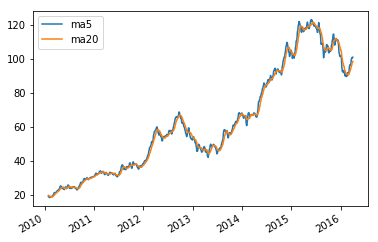

In [2]:
result[['ma5', 'ma20']].plot()

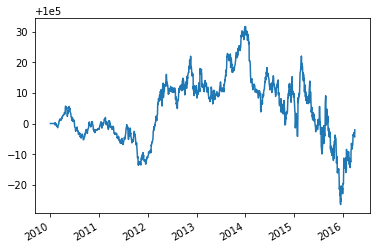

In [3]:
# starts at 100,000 dollars on y axis
result['portfolio_value'].plot()

In [4]:
result['portfolio_value'].tail()

2016-03-22 20:00:00+00:00    99997.034487
2016-03-23 20:00:00+00:00    99996.474237
2016-03-24 20:00:00+00:00    99996.037416
2016-03-28 20:00:00+00:00    99995.581636
2016-03-29 20:00:00+00:00    99997.946100
Name: portfolio_value, dtype: float64

# 이동평균선 전략 보완하기 - Golden cross, Dead cross

In [6]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 3, 29)
data = web.DataReader("AAPL", "yahoo", start, end)

#plt.plot(data.index, data['Adj Close'])
#plt.show()

data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

#print(data.head())

def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')
    context.hold = False # variant to save info whether holding equity or not

def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return
    
    buy = False
    sell = False

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True # save buy day every transaction day
    elif ma5 < ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True # save sell day every transaction day

    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Anaconda3\envs\py35\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


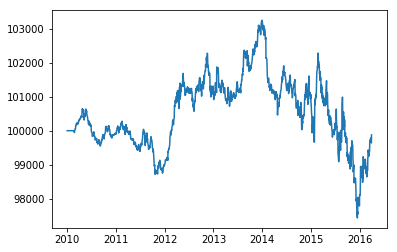

In [7]:
plt.plot(result.index, result.portfolio_value)

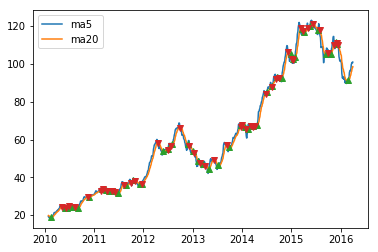

In [16]:
plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.legend(loc='best')
plt.plot(result.index[result.buy == True], result.ma5[result.buy == True], '^')
plt.plot(result.index[result.sell == True], result.ma5[result.sell == True], 'v')
plt.show()

# 거래 수수료 설정

In [18]:
import pandas_datareader.data as web
import datetime
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')

def handle_data(context, data):
    order_target(context.sym, 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash    ending_cash  ending_value
2016-01-04 21:00:00+00:00  100000.000000  100000.000000      0.000000
2016-01-05 21:00:00+00:00  100000.000000   54963.355213  45014.136719
2016-01-06 21:00:00+00:00   54963.355213   54963.355213  43199.050781
2016-01-07 21:00:00+00:00   54963.355213   54963.355213  42609.148438
2016-01-08 21:00:00+00:00   54963.355213   54963.355213  44832.628906
2016-01-11 21:00:00+00:00   54963.355213   54963.355213  43834.332031
2016-01-12 21:00:00+00:00   54963.355213   54963.355213  44741.875000
2016-01-13 21:00:00+00:00   54963.355213   54963.355213  44878.007812
2016-01-14 21:00:00+00:00   54963.355213   54963.355213  44424.234375
2016-01-15 21:00:00+00:00   54963.355213   54963.355213  43562.070312
2016-01-19 21:00:00+00:00   54963.355213   54963.355213  43062.921875
2016-01-20 21:00:00+00:00   54963.355213   54963.355213  42836.035156
2016-01-21 21:00:00+00:00   54963.355213   54963.355213  43425.937500
2016-01-22 21:00:00+

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



In [19]:
# To set commission, import set_commission and commission
from zipline.api import set_commission, commission

In [20]:
# Call set_commission module and PerDollar model
def initialize(context):
    set_commission(commission.PerDollar(cost=0.00165))

In [22]:
import pandas_datareader.data as web
import datetime
from zipline.api import order_target, record, symbol
from zipline.api import set_commission, commission
from zipline.algorithm import TradingAlgorithm
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))

def handle_data(context, data):
    order_target(context.sym, 1)

algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash    ending_cash  ending_value
2016-01-04 21:00:00+00:00  100000.000000  100000.000000      0.000000
2016-01-05 21:00:00+00:00  100000.000000   54889.045751  45014.136719
2016-01-06 21:00:00+00:00   54889.045751   54889.045751  43199.050781
2016-01-07 21:00:00+00:00   54889.045751   54889.045751  42609.148438
2016-01-08 21:00:00+00:00   54889.045751   54889.045751  44832.628906
2016-01-11 21:00:00+00:00   54889.045751   54889.045751  43834.332031
2016-01-12 21:00:00+00:00   54889.045751   54889.045751  44741.875000
2016-01-13 21:00:00+00:00   54889.045751   54889.045751  44878.007812
2016-01-14 21:00:00+00:00   54889.045751   54889.045751  44424.234375
2016-01-15 21:00:00+00:00   54889.045751   54889.045751  43562.070312
2016-01-19 21:00:00+00:00   54889.045751   54889.045751  43062.921875
2016-01-20 21:00:00+00:00   54889.045751   54889.045751  42836.035156
2016-01-21 21:00:00+00:00   54889.045751   54889.045751  43425.937500
2016-01-22 21:00:00+

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



# 초기 투자금액 설정

In [2]:
import pandas_datareader.data as web
import datetime
from zipline.api import order, record, symbol
from zipline.algorithm import TradingAlgorithm
from zipline.api import set_commission, commission
# 책과 다른 부분 -> capital_base를 설정하기 위해
from zipline.utils.factory import create_simulation_parameters
import matplotlib.pyplot as plt

start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)
data = web.DataReader("078930.KS", "yahoo", start, end)

data = data[['Adj Close']]
data.columns = ['GS']
data = data.tz_localize('UTC')

def initialize(context):
    context.i = 0
    context.sym = symbol('GS')
    set_commission(commission.PerDollar(cost=0.00165))

def handle_data(context, data):
    #order_target(context.sym, 1)
    order(context.sym, 1)

# Set initial money(won) with capital_base with create_simulation_parameters
algo = TradingAlgorithm(sim_params=create_simulation_parameters(
            capital_base=100000000), initialize=initialize, handle_data=handle_data)
result = algo.run(data)

print(result[['starting_cash', 'ending_cash', 'ending_value']])

                           starting_cash   ending_cash   ending_value
2016-01-04 21:00:00+00:00   1.000000e+08  1.000000e+08       0.000000
2016-01-05 21:00:00+00:00   1.000000e+08  9.995489e+07   45014.136719
2016-01-06 21:00:00+00:00   9.995489e+07  9.991160e+07   86398.101562
2016-01-07 21:00:00+00:00   9.991160e+07  9.986890e+07  127827.445312
2016-01-08 21:00:00+00:00   9.986890e+07  9.982397e+07  179330.515625
2016-01-11 21:00:00+00:00   9.982397e+07  9.978004e+07  219171.660156
2016-01-12 21:00:00+00:00   9.978004e+07  9.973520e+07  268451.250000
2016-01-13 21:00:00+00:00   9.973520e+07  9.969023e+07  314146.054688
2016-01-14 21:00:00+00:00   9.969023e+07  9.964571e+07  355393.875000
2016-01-15 21:00:00+00:00   9.964571e+07  9.960205e+07  392058.632812
2016-01-19 21:00:00+00:00   9.960205e+07  9.955889e+07  430629.218750
2016-01-20 21:00:00+00:00   9.955889e+07  9.951597e+07  471196.386719
2016-01-21 21:00:00+00:00   9.951597e+07  9.947245e+07  521111.250000
2016-01-22 21:00:00+

C:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

